In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [90]:
# Load the data:

results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')


In [91]:
# Merge datasets:

df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on='driverId', how='left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')

In [92]:
# Drop columns:

df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'], 
        axis=1, inplace=True)

df

,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,18,16,0.0,\N,\N,18,1:23.882,226.518,2022,Australian Grand Prix,3,latifi,Canadian,Williams,British
25456,10,17,0.0,\N,\N,2,1:20.846,235.024,2022,Australian Grand Prix,3,alonso,Spanish,Alpine F1 Team,French
25457,2,18,0.0,\N,\N,6,1:21.677,232.633,2022,Australian Grand Prix,3,max_verstappen,Dutch,Red Bull,Austrian
25458,17,19,0.0,\N,\N,19,1:25.189,223.042,2022,Australian Grand Prix,3,vettel,German,Aston Martin,British


In [93]:
# Rename some of the columns:

df.rename(columns={'rank':'fastest_lap_rank', 'name_x':'gp_name', 'nationality_x':'driver_nationality',
                   'name_y':'constructor_name', 'nationality_y':'constructor_nationality', 'driverRef':'driver', 
                   'positionOrder':'position_order', 'fastestLapTime':'fastest_lap_time', 'fastestLapSpeed':'fastest_lap_speed'}, inplace=True)

df

,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,18,16,0.0,\N,\N,18,1:23.882,226.518,2022,Australian Grand Prix,3,latifi,Canadian,Williams,British
25456,10,17,0.0,\N,\N,2,1:20.846,235.024,2022,Australian Grand Prix,3,alonso,Spanish,Alpine F1 Team,French
25457,2,18,0.0,\N,\N,6,1:21.677,232.633,2022,Australian Grand Prix,3,max_verstappen,Dutch,Red Bull,Austrian
25458,17,19,0.0,\N,\N,19,1:25.189,223.042,2022,Australian Grand Prix,3,vettel,German,Aston Martin,British


In [94]:
# Rearrange the columns:

df = df[['year', 'gp_name', 'round', 'driver', 'constructor_name', 'grid', 'position_order', 'points', 'time', 'milliseconds',
        'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 'driver_nationality', 'constructor_nationality']]

In [95]:
# Drop season 2019:

df = df[df['year'] != 2019]

In [96]:
# Sort Values:

df = df.sort_values(by=['year', 'round','position_order'], ascending=[False, True, True])

In [97]:
# Replace the \N values in time col:

df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastest_lap_rank.replace('\\N', np.nan, inplace=True)
df.fastest_lap_time.replace('\\N', np.nan, inplace=True)
df.fastest_lap_speed.replace('\\N', np.nan, inplace=True)

In [98]:
# Change the data types:

df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds= df.milliseconds.astype(float)

In [99]:
# Reset Index:

df.reset_index(drop=True, inplace=True)

In [100]:
# Shape:

print(df.shape)

(25040, 15)


In [101]:
# Information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25040 non-null  int64  
 1   gp_name                  25040 non-null  object 
 2   round                    25040 non-null  int64  
 3   driver                   25040 non-null  object 
 4   constructor_name         25040 non-null  object 
 5   grid                     25040 non-null  int64  
 6   position_order           25040 non-null  int64  
 7   points                   25040 non-null  float64
 8   time                     6654 non-null   object 
 9   milliseconds             6653 non-null   float64
 10  fastest_lap_rank         6791 non-null   float64
 11  fastest_lap_time         6594 non-null   object 
 12  fastest_lap_speed        6594 non-null   float64
 13  driver_nationality       25040 non-null  object 
 14  constructor_nationalit

In [102]:
# Head of Data Frame:

df.head(10)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
5,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,+16.119,5869703.0,7.0,1:36.599,201.691,Finnish,Swiss
6,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,+19.423,5873007.0,14.0,1:37.110,200.630,French,French
7,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,+20.386,5873970.0,13.0,1:37.104,200.642,Japanese,Italian
8,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,+22.390,5875974.0,10.0,1:36.733,201.412,Spanish,French
9,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,+23.064,5876648.0,9.0,1:36.685,201.512,Chinese,Swiss


In [103]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = (10,6)

([], [])

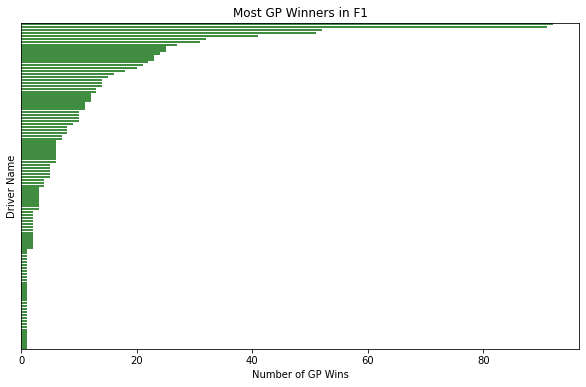

In [105]:
# GP winners:

driver_winner = df.loc[df['position_order'] == 1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

# Bar Plot

sb.barplot(data=driver_winner, y='driver', x='position_order', color='green', alpha=0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
plt.yticks([])

In [106]:
# Creating a new data frame of top 10 GP winners:

top_10_drivers = driver_winner.head(10)
print(top_10_drivers)

               driver  position_order
0            hamilton              92
1  michael_schumacher              91
2              vettel              52
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


Text(0.5, 0, 'Number of GP Wins')

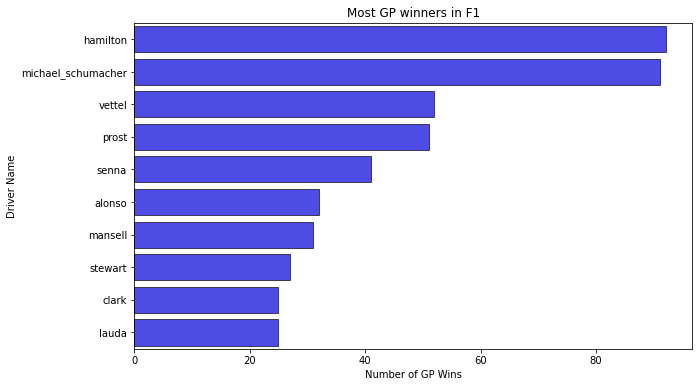

In [107]:
# Top 10 driver plots:

sb.barplot(data=top_10_drivers, y='driver', x='position_order', color='blue', alpha=0.8, linewidth=0.8, edgecolor='black')
plt.title('Most GP winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')

([], [])

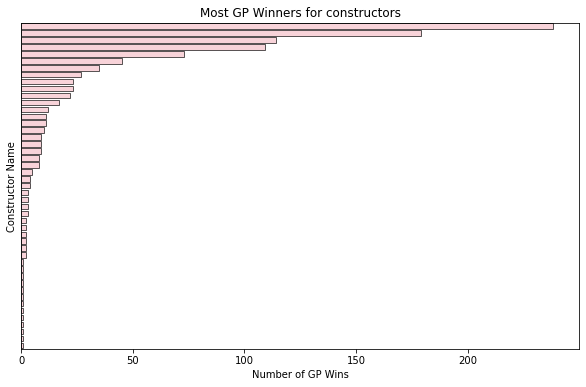

In [109]:
# GP Counstructor winners:

constructor_winner = df.loc[df['position_order'] == 1].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

# Bar Plot

sb.barplot(data=constructor_winner, y='constructor_name', x='position_order', color='pink', alpha=0.8, linewidth=0.8, edgecolor='black')
plt.title('Most GP Winners for constructors')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP Wins')
plt.yticks([])

In [111]:
# Creating a new data frame of top 10 GP winners:

top_10_constructors = constructor_winner.head(10)
print(top_10_constructors)

  constructor_name  position_order
0          Ferrari             238
1          McLaren             179
2         Williams             114
3         Mercedes             109
4         Red Bull              73
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Number of GP Wins')

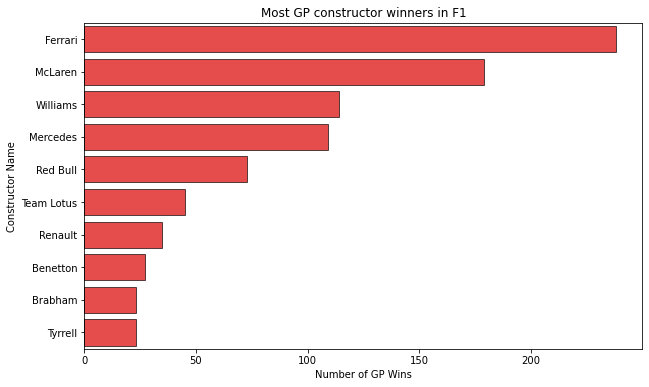

In [114]:
# Barplot for top 10 constructors:

sb.barplot(data=top_10_constructors, y='constructor_name', x='position_order', color='red', alpha=0.8, linewidth=0.8, edgecolor='black')
plt.title('Most GP constructor winners in F1')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP Wins')

Text(0.5, 0, 'Starting Position')

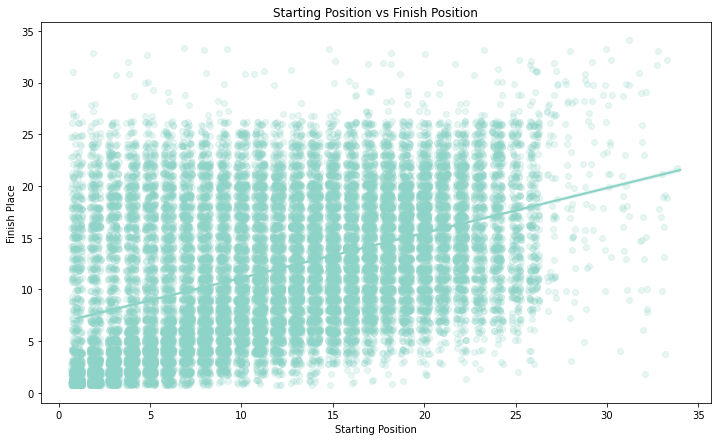

In [115]:
# Regression Plot:

df_no_zero = df[df['grid'] != 0]

# Creating the plot 

plt.figure(figsize=(12,7))
sb.regplot(data=df_no_zero, x ='grid', y='position_order', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha': 1/5})
plt.title('Starting Position vs Finish Position')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position')

Text(0.5, 0.98, 'Average speed amougst all teams during the fastest lap at individual GPs')

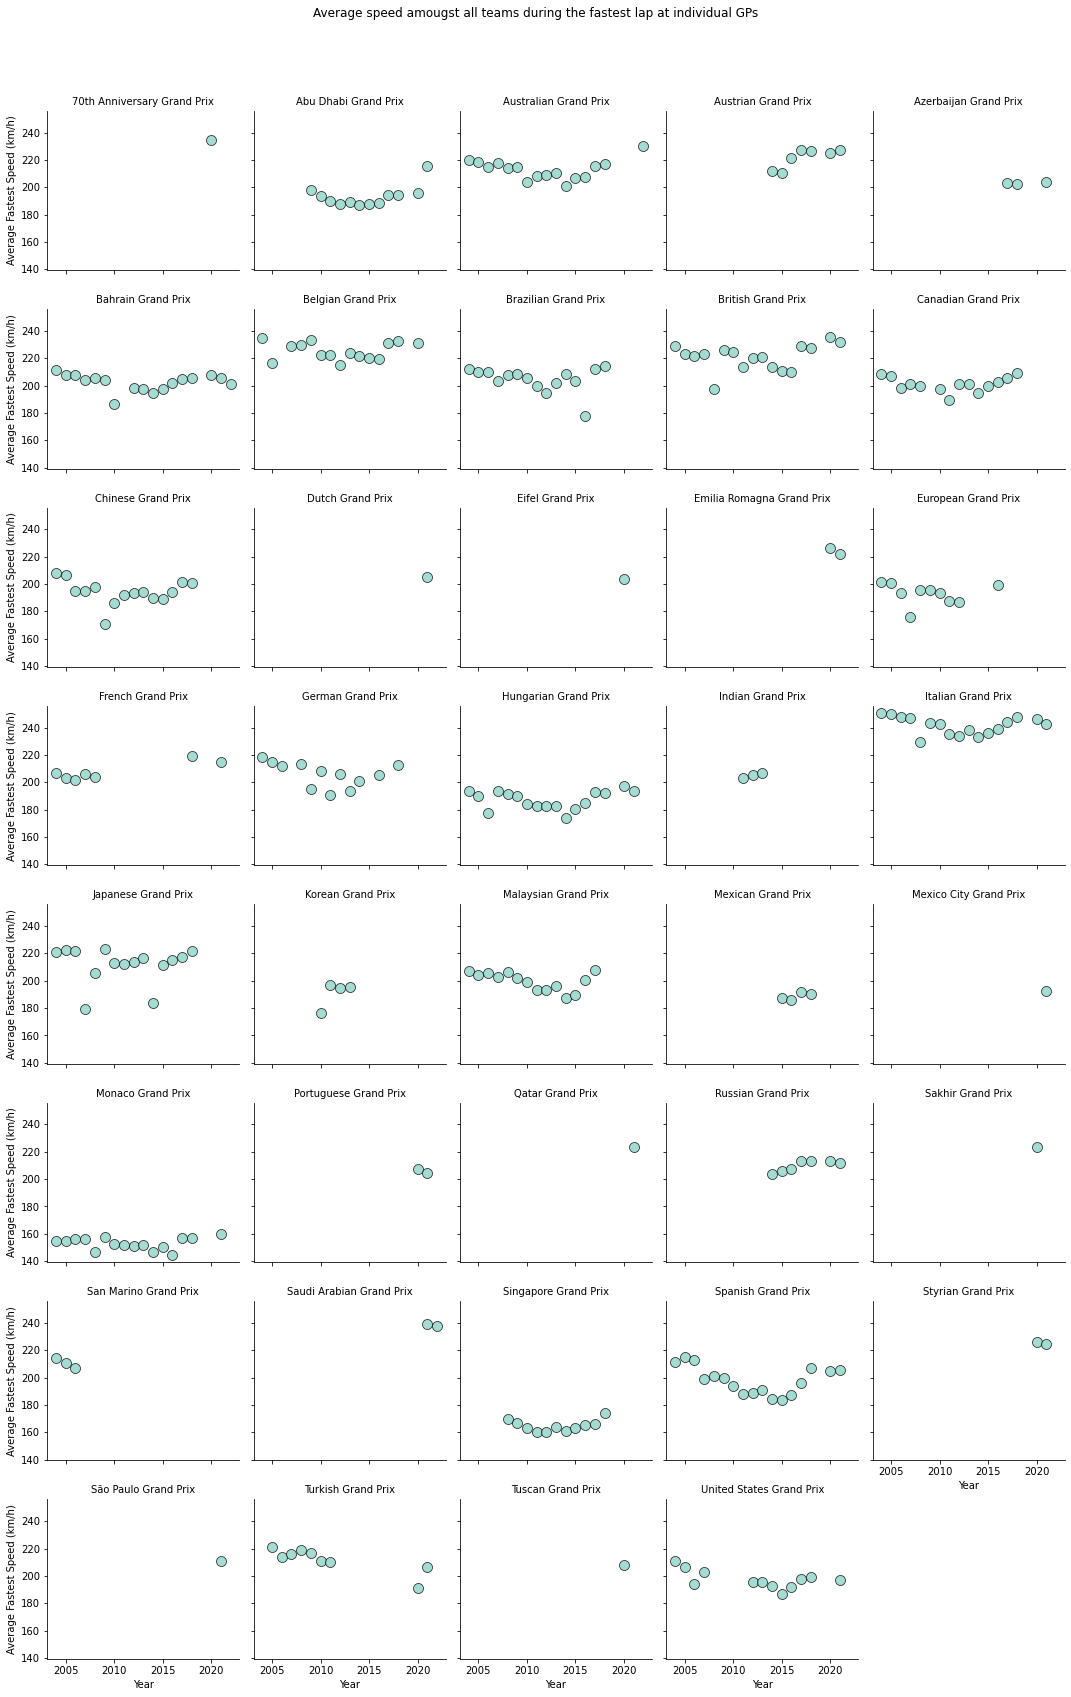

In [117]:
# Checking Speed of the cars over the years:

# Creating a new data frame for seasons 2004 onwards:
df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

# Create a facetgrid:
g = sb.FacetGrid(data=df_group_speed, col='gp_name', col_wrap=5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha=0.8, linewidth=0.8, edgecolor='black', s=100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average Fastest Speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amougst all teams during the fastest lap at individual GPs')